In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data from csv file:
df = pd.read_csv('Checkouts_by_Title.csv')

/Users/oana/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Quick look at the data:

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34464167 entries, 0 to 34464166
Data columns (total 11 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutYear       int64
CheckoutMonth      int64
Checkouts          object
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtypes: int64(2), object(9)
memory usage: 2.8+ GB
None


In order to select a subset, I am going to look at the Subjects column. First, let's see how specific the information in this column is (can I extract genre out of it easily?). Print the number of different Subjects contents in the whole database:

In [4]:
len(df.Subjects.unique())

805197

That's a lot of different things to have in the Subjects, which possibly means that the Subjects are lists that have little overlap. I am going to have to look at some examples to get an idea of what the Subjects columns contain:

In [5]:
print(df.head())
df.Subjects.unique()[1:20]

  UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth Checkouts  \
0   Physical      Horizon         BOOK          2018              2         3   
1    Digital    OverDrive        EBOOK          2018              2        12   
2    Digital       Hoopla        MUSIC          2018              2         1   
3   Physical      Horizon         BOOK          2018              2         1   
4    Digital    OverDrive        EBOOK          2018              2         2   

                                               Title  \
0  Austria / main contributors, Teresa Czerniewic...   
1  A Random Walk Down Wall Street: The Time-Teste...   
2                               Alone Aboard the Ark   
3  One minute mysteries : 65 short mysteries you ...   
4  Bonjour Kale: A Memoir of Paris, Love, and Rec...   

                    Creator  \
0  Czerniewicz-Umer, Teresa   
1         Burton G. Malkiel   
2                       NaN   
3               Yoder, Eric   
4           Kristen B

array(['Business, Finance, Nonfiction', 'Alternative',
       'Science Methodology Juvenile literature, Science Miscellanea Juvenile literature, Science Study and teaching Middle school Juvenile literature, Mystery and detective stories, Mystery fiction',
       'Biography & Autobiography, Cooking & Food, Nonfiction',
       'Crafts, Nature, Nonfiction',
       'Police California Los Angeles Drama, Criminal investigation California Los Angeles Drama, Police corruption California Los Angeles Drama, Police corruption Drama, Inner cities California Los Angeles Drama, Crime California Los Angeles Drama, Los Angeles Calif Drama, Television programs, Fiction television programs, Television cop shows, Thrillers Television programs, Video recordings for the hearing impaired',
       'Trump Donald 1946, Trump Donald 1946 Political and social views, Republican Party U S 1854, Presidents United States Election 2016, United States Politics and government 2009',
       'Dante Alighieri 1265 1321 Di

The Subjects column indeed contains a list of tag words or phrases, some that pop out - also as genres - are juvenile fiction, young adult fiction, Fantasy, Romance. Also notable, there are lots of entries that are not books at all, but rather music (recordings or sheet music) or films. Since it looks like the column MaterialType contains information about the medium of the item, let's check it out and see if we can eliminate anything that's not a book:

In [6]:
df.MaterialType.unique()

array(['BOOK', 'EBOOK', 'MUSIC', 'VIDEODISC', 'AUDIOBOOK', 'SOUNDDISC',
       'SONG', 'COMIC', 'CR', 'MAGAZINE', 'TELEVISION', 'MOVIE',
       'VIDEOCASS', 'SOUNDDISC, VIDEODISC', 'REGPRINT', 'VIDEO', 'ATLAS',
       'ER, VIDEODISC', 'ER', 'SOUNDREC', 'LARGEPRINT', 'ER, SOUNDDISC',
       'REGPRINT, SOUNDDISC', 'MAP', 'VISUAL', 'MIXED', 'VIDEOCART',
       'VIDEOCASS, VIDEODISC', 'MUSICSNDREC', 'NOTATEDMUSIC',
       'SOUNDDISC, SOUNDREC', 'ER, REGPRINT', 'REGPRINT, VIDEOREC',
       'ER, NONPROJGRAPH', 'VIDEOREC', 'UNSPECIFIED', 'SOUNDCASS',
       'MICROFORM', 'GLOBE', 'FLASHCARD, SOUNDDISC', 'KIT', 'ER, PRINT',
       'FLASHCARD', 'SOUNDDISC, VIDEOCASS', 'SOUNDCASS, SOUNDDISC',
       'PICTURE', 'PRINT', 'COMPFILE', 'NONPROJGRAPH', 'SLIDE, SOUNDCASS',
       'SOUNDCASS, SOUNDDISC, VIDEOCASS, VIDEODISC', 'ER, VIDEOREC',
       'REMOTESEN', 'ER, MAP', 'SLIDE', 'SLIDE, SOUNDCASS, VIDEOCASS',
       'SLIDE, VIDEOCASS', 'SOUNDCASS, VIDEOCASS', 'ATLAS, ER', 'CHART',
       'PICTURE, VIDE

Most of the values in this column are video or audio files of some sort, and it seems that the word "BOOK" will be a good way to isolate just the books from the database:

In [7]:
df = df[df['MaterialType'].str.contains("BOOK")==True]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25021025 entries, 0 to 34464166
Data columns (total 11 columns):
UsageClass         object
CheckoutType       object
MaterialType       object
CheckoutYear       int64
CheckoutMonth      int64
Checkouts          object
Title              object
Creator            object
Subjects           object
Publisher          object
PublicationYear    object
dtypes: int64(2), object(9)
memory usage: 2.2+ GB


In [8]:
df.head(10)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2018,2,3,"Austria / main contributors, Teresa Czerniewic...","Czerniewicz-Umer, Teresa","Austria Description and travel, Austria Guideb...","DK Publishing,",[2016]
1,Digital,OverDrive,EBOOK,2018,2,12,A Random Walk Down Wall Street: The Time-Teste...,Burton G. Malkiel,"Business, Finance, Nonfiction",W. W. Norton & Company,2015
3,Physical,Horizon,BOOK,2018,2,1,One minute mysteries : 65 short mysteries you ...,"Yoder, Eric","Science Methodology Juvenile literature, Scien...","Science, Naturally!,",2008.
4,Digital,OverDrive,EBOOK,2018,2,2,"Bonjour Kale: A Memoir of Paris, Love, and Rec...",Kristen Beddard,"Biography & Autobiography, Cooking & Food, Non...",Sourcebooks,2017
5,Digital,OverDrive,EBOOK,2018,2,3,The Man Who Made Things Out of Trees: The Ash ...,Robert Penn,"Crafts, Nature, Nonfiction",W. W. Norton & Company,2016
7,Physical,Horizon,BOOK,2018,2,1,Big agenda : President Trump's plan to save Am...,"Horowitz, David, 1939-","Trump Donald 1946, Trump Donald 1946 Political...","Humanix Books,",c2017.
8,Physical,Horizon,BOOK,2018,2,2,The divine comedy / Dante Alighieri ; translat...,"Dante Alighieri, 1265-1321",Dante Alighieri 1265 1321 Divina commedia,"Knopf : Distributed by Random House,",[1995]
9,Physical,Horizon,BOOK,2018,2,1,The library / by B.A. Hoena.,"Hoena, B. A.",Libraries Juvenile literature,"Pebble Plus/Capstone Press,",[2004]
10,Physical,Horizon,BOOK,2018,2,2,The pharaoh's secret : a novel from the NUMA f...,"Cussler, Clive","Austin Kurt Fictitious character Fiction, Mari...","G.P. Putnam's Sons,",[2015]
11,Digital,OverDrive,EBOOK,2018,2,1,"A Texan's Luck: The Wife Lottery Series, Book 3",Jodi Thomas,"Fiction, Romance","Penguin Group (USA), Inc.",2013


Good, it seems there are all kinds of books in the dataset. I am going to create a few subsets from this big data set. I am particularly attracted to young adult literature, crime and detective stories, young women and girls literature, and maybe sci-fi. I will explore very briefly each of these subsets to check the size of each subset, the number of rows with missing data, and anything out of the ordinary in other columns. First, let's isolate some subsets:

In [11]:
df1 = df[df['Subjects'].str.contains("Detective|Investigator|Crime|Murder")==True]
df2 = df[df['Subjects'].str.contains("Young Adult|Juvenile|Young adult")==True]
df3 = df[df['Subjects'].str.contains("Sci-Fi|Science fiction|Science Fiction")==True]
df4 = df[df['Subjects'].str.contains("Young women|Teenage girls")==True]


In [12]:
df1.info()
#enough variation in numbers of checkouts?
print('Number of checkout values for the set: ' + str(len(df1.Checkouts.unique())))
print()
print(df1.isnull().sum())
print()
df2.info()
#enough variation in numbers of checkouts?
print('Number of checkout values for the set: ' + str(len(df2.Checkouts.unique())))
print()
print(df2.isnull().sum())
print()
df3.info()
#enough variation in numbers of checkouts?
print('Number of checkout values for the set: ' + str(len(df3.Checkouts.unique())))
print()
print(df3.isnull().sum())
print()
df4.info()
#enough variation in numbers of checkouts?
print('Number of checkout values for the set: ' + str(len(df4.Checkouts.unique())))
print()
print(df4.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549515 entries, 81 to 34464165
Data columns (total 11 columns):
UsageClass         549515 non-null object
CheckoutType       549515 non-null object
MaterialType       549515 non-null object
CheckoutYear       549515 non-null int64
CheckoutMonth      549515 non-null int64
Checkouts          549515 non-null object
Title              549515 non-null object
Creator            439007 non-null object
Subjects           549515 non-null object
Publisher          445801 non-null object
PublicationYear    445861 non-null object
dtypes: int64(2), object(9)
memory usage: 50.3+ MB
Number of checkout values for the set: 422

UsageClass              0
CheckoutType            0
MaterialType            0
CheckoutYear            0
CheckoutMonth           0
Checkouts               0
Title                   0
Creator            110508
Subjects                0
Publisher          103714
PublicationYear    103654
dtype: int64

<class 'pandas.core.frame.DataF

In [13]:
df1['Checkouts'] = df1.Checkouts.astype('int')
df1.tail()

/Users/oana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
34463975,Physical,Horizon,BOOK,2018,2,1,The death of Lucy Kyte / Nicola Upson.,"Upson, Nicola","Tey Josephine 1896 or 1897 1952 Fiction, Women...","Bourbon Street Books,",2014.
34463996,Physical,Horizon,BOOK,2018,2,3,Canal Days calamity / Jamie M. Blair.,"Blair, Jamie M.","Murder Investigation Fiction, City and town li...","Midnight Ink,",[2017]
34464048,Digital,OverDrive,EBOOK,2018,2,4,The Fact of a Body: A Murder and a Memoir,Alexandria Marzano-Lesnevich,"Family & Relationships, Nonfiction, True Crime",Macmillan Publishers,2017
34464089,Physical,Horizon,BOOK,2018,2,1,Midnight crossing / Tricia Fields.,"Fields, Tricia","Women police chiefs Fiction, Murder Investigat...","Minotaur Books,",2016.
34464165,Physical,Horizon,BOOK,2018,2,4,Mayhem & mass / Olivia Matthews.,"Matthews, Olivia","Murder Fiction, Nuns Fiction, Catholics Fictio...","Kensington Books,",2017.


In [14]:
df1.describe(include='all')

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
count,549515,549515,549515,549515.000000,549515.000000,549515.000000,549515,439007,549515,445801,445861
unique,2,2,3,NaN,NaN,NaN,21147,7337,24837,2762,723
top,Physical,Horizon,BOOK,NaN,NaN,NaN,The stranger / Albert Camus ; translated from ...,"Patterson, James, 1947-","Nonfiction, True Crime","Thorndike Press,",2012.
freq,524007,524007,524007,NaN,NaN,NaN,333,6624,8592,28159,22922
mean,NaN,NaN,NaN,2013.423519,6.464175,3.457715,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,4.016596,3.380661,9.805771,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2005.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2010.000000,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2014.000000,6.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2017.000000,9.000000,3.000000,NaN,NaN,NaN,NaN,NaN


Interestingly, the items in this dataset have been checked out up to 810 times (there is at least one item checked out 810 times), with an average of 3.45 times. Considering that the vast majority of books get checked out once or twice, that's not too bad. 

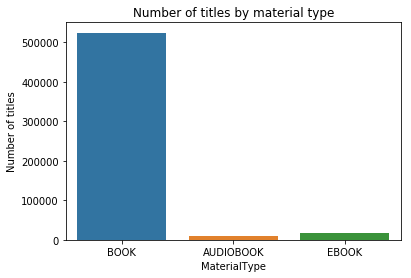

In [15]:
sns.countplot("MaterialType", data=df1)
plt.title("Number of titles by material type")
plt.ylabel("Number of titles");

Most of the inventory is made of actual books, with a very small percentage of ebooks and audiobooks, probably also due to the fact that the data has been collected since 2005, while ebooks and audiobooks became popular only in the last few years.

How many different Authors and how many different Titles do we have, actually?


In [16]:
print('Titles: ' + str(len(df1.Title.unique())))
print('Authors: ' + str(len(df1.Creator.unique())))

Titles: 21147
Authors: 7338
